Quick notebook to make an annotated gif from the input bike frames

Takes images within current directory's ./bike folder and writes the first 3 chars onto upper left and saves those to `/tmp`. Then grab those images, make into a gif with imageio, and save gif into current directory's ./figures subfolder

In [1]:
# !pip install pygifsicle

In [6]:
folder_name = 'bike'

In [4]:
from pathlib import Path
import imageio
import matplotlib.pyplot as plt
import numpy as np
import cv2

from pygifsicle import optimize

Grab images and write first 3 chars on upper left

In [7]:
img_paths = sorted((Path.cwd()/folder_name).glob('t*.png'))
[_.name for _ in img_paths]

['t10r10.png', 't15r10.png', 't20r20.png', 't25r10.png', 't30r10.png']

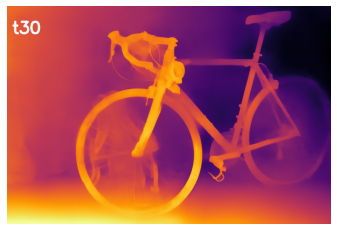

In [9]:
font = cv2.FONT_HERSHEY_SIMPLEX
frames = []

for i, img_path in enumerate(img_paths):
  img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)

  cv2.putText(img,img_path.stem[:3],(50,250), font, 5,(255,255,255),20)

  plt.imshow(img)
  plt.axis("off")
  plt.savefig(f'/tmp/{i}.png')
  frames.append(f'/tmp/{i}.png')

In [10]:
images = []
for file_path in frames:
  images.append(imageio.imread(file_path))
  imageio.mimsave(f'figures/{folder_name}_exp.gif', images, duration=1)

In [11]:
!ls ./figures

bike_exp.gif        observation.png     patchmerge.gif      sample2_leres.jpg
explanation.png     overview.png        patchselection.gif  sample2_midas.png
merge.png           patchexpand.gif     ressearch.png       video_thumbnail.jpg
